In [ ]:
# Inverse Kinematics 2R Planar Fixed Axis 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def inverse_kinematics(x, y, l1, l2, elbow):  # elbow parameter = 1 or -1 for elbow down and up configurations
    D = (x ** 2 + y ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2)
    if elbow == 1:
        q2 = elbow * np.arctan2(np.sqrt(1 - D ** 2), D)  # q2 as measured from frame of link 1
        q1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2), l1 + l2 * np.cos(q2))
        q2 = q2 + q1  # if q2 is not measured from inertial frame then remove this line
    if elbow == -1:
        q2 = elbow * np.arctan2(np.sqrt(1 - D ** 2), D)  # q2 as measured from frame of link 1
        q1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2), l1 + l2 * np.cos(q2))
        q2 = q2 + q1  # if q2 is not measured from inertial frame then remove this line
    return q1, q2

In [ ]:
df=pd.read_excel('/content/Gait_DATA.xlsx')

df.head()

,X (cm),Y (cm)
0,46.108625,12.809129
1,45.628312,12.786217
2,45.105438,12.732817
3,44.568188,12.646511
4,44.005938,12.526861


In [ ]:
q1=[]
q2=[]
l1= 0.6
l2= 0.55
elbow = 1
for x,y in df.values:
  # print(x,y)
  t1,t2=inverse_kinematics(x*0.01,y*0.01,l1,l2,elbow)
  q1.append(t1)
  q2.append(t2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# As some of the values are not defined in workspace, so adjusting values of link lengths l1, l2
#Let us assume l1= 0.28, l2=0.28

l1=0.28
l2=0.28
q1=[]
q2=[]
elbow = 1
for x,y in df.values:
  # print(x,y)
  t1,t2=inverse_kinematics(x*0.01,y*0.01,l1,l2,elbow)
  q1.append(t1)
  q2.append(t2)



In [ ]:
# list q1 contains the angles theta1 for different points x,y of the ankle
q1


In [ ]:
# list q2 contains the angles theta1 for different points x,y of the ankle
q2

In [ ]:
# Forward Kinematics 2R Planar Fixed Axis
def forward_kinematics(q1, q2, l1, l2):
    x1 = l1 * np.cos(q1)
    y1 = l1 * np.sin(q1)
    x2 = l1 * np.cos(q1) + l2 * np.cos(q2)  # l2*np.cos(q2+q1) will be second term if q2 measured from link1
    y2 = l1 * np.sin(q1) + l2 * np.sin(q2)  # l2*np.sin(q2+q1) will be second term if q2 measured from link1
    return x1, y1, x2, y2

In [ ]:
X1 = []
Y1 = []
X2 = []
Y2 = []
for t1, t2 in zip(q1,q2):
  x1,y1,x2,y2 = forward_kinematics(t1,t2,l1,l2)
  X1.append(x1*100)
  X2.append(x2*100)
  Y1.append(y1*100)
  Y2.append(y2*100)


In [ ]:
import matplotlib.pyplot as plt


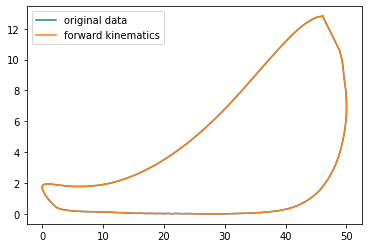

In [ ]:
plt.plot(df['X (cm)'],df['Y (cm)'])
plt.plot(X2,Y2)
plt.legend(['original data', 'forward kinematics'])
plt.show()